In [60]:
# Importing dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Importing csv files
visa_df = pd.read_csv('Data\ABS_NOM_VISA.csv')
age_gender_df = pd.read_csv('Data\ABS_NOM_AGE-GENDER.csv')
visa_df.head()


,DATAFLOW,MEASURE: Type of Visa,MIGRATIONTYPE: Migration Type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2005,2300,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
1,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2006,3630,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
2,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2007,7130,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
3,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2008,10130,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June
4,ABS:ABS_NOM_VISA_FY(1.0.0),2: Temporary visa - Vocational Education and T...,1: NOM arrivals,2: Victoria,A: Annual,2009,20180,PSNS: Persons,NaN,NaN,30-6: Year Ending 30 June


In [62]:
# Creating pivot table for visa_df
table1 = visa_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table1

,OBS_VALUE
REGION: Region,
1: New South Wales,7666070
2: Victoria,5970350
3: Queensland,3821850
4: South Australia,1127480
5: Western Australia,2583950
6: Tasmania,204280
7: Northern Territory,245780
8: Australian Capital Territory,391610
AUS: Australia,22011150


In [63]:
#Dropping any rows that contain the word 'Total'
rows_to_drop = visa_df[visa_df['MEASURE: Type of Visa'].str.contains('Total')].index
updated_visa_df = visa_df.drop(rows_to_drop)
# Updated pivot table
table2 = updated_visa_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table2

,OBS_VALUE
REGION: Region,
1: New South Wales,2788380
2: Victoria,2159460
3: Queensland,1461430
4: South Australia,403270
5: Western Australia,951890
6: Tasmania,75140
7: Northern Territory,94870
8: Australian Capital Territory,146930
AUS: Australia,8080740


In [83]:
visa_array = updated_visa_df['MEASURE: Type of Visa'].unique()
i = 1

visa_bracket_dict = {}
for i, visa in enumerate(visa_array):
    visa_bracket = updated_visa_df[updated_visa_df['MEASURE: Type of Visa'] == visa]
    visa_bracket1 = visa_bracket.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
   # plt.plot(age_bracket1.index, age_bracket1.values, label=age)
    visa_bracket_dict[visa] = visa_bracket1

v_df = pd.DataFrame(visa_bracket_dict)
v_df

,2: Temporary visa - Vocational Education and Training sector,4: Temporary visa - Student other,5: Temporary visa - Temporary work (skilled),6: Temporary visa - Visitor,7: Temporary visa - Working Holiday,8: Temporary visa - Other temporary visas,12: Permanent visa - Special Eligibility and humanitarian,14: Australian Citizen,3: Temporary visa - Higher education sector,10: Permanent visa - Family,11: Permanent visa - Skill,13: New Zealand Citizen (subclass 444),15: Permanent visa - Other permanent visas,17: Other Visas
TIME_PERIOD: Time Period,,,,,,,,,,,,,,
2005,15970,50900,34190,71540,25860,18650,27160,138520,65510,56870,71090,74660,7310,24610
2006,20990,41110,55460,72200,34170,15170,24640,145220,84090,60800,85500,77500,7280,28950
2007,39960,51620,71700,75200,43260,13560,24810,150600,115880,64970,95090,88850,7540,31910
2008,62840,58320,88020,99990,58240,13850,18960,151670,146300,66200,103190,103360,7880,23920
2009,107150,54220,88120,84680,68610,11450,23260,160870,144150,70120,96720,93770,8000,28460
2010,51420,48910,52540,80510,66070,10660,19840,157750,113010,71180,82280,77260,7980,36450
2011,22000,42660,71200,83430,86930,12910,18360,157750,86040,67470,66120,107240,8650,32860
2012,20320,42490,95770,85450,109240,14210,15400,152140,83750,69540,81970,122150,8510,33820
2013,16920,42520,86920,95840,118500,14450,17080,154210,113000,70490,76050,108240,9930,40130


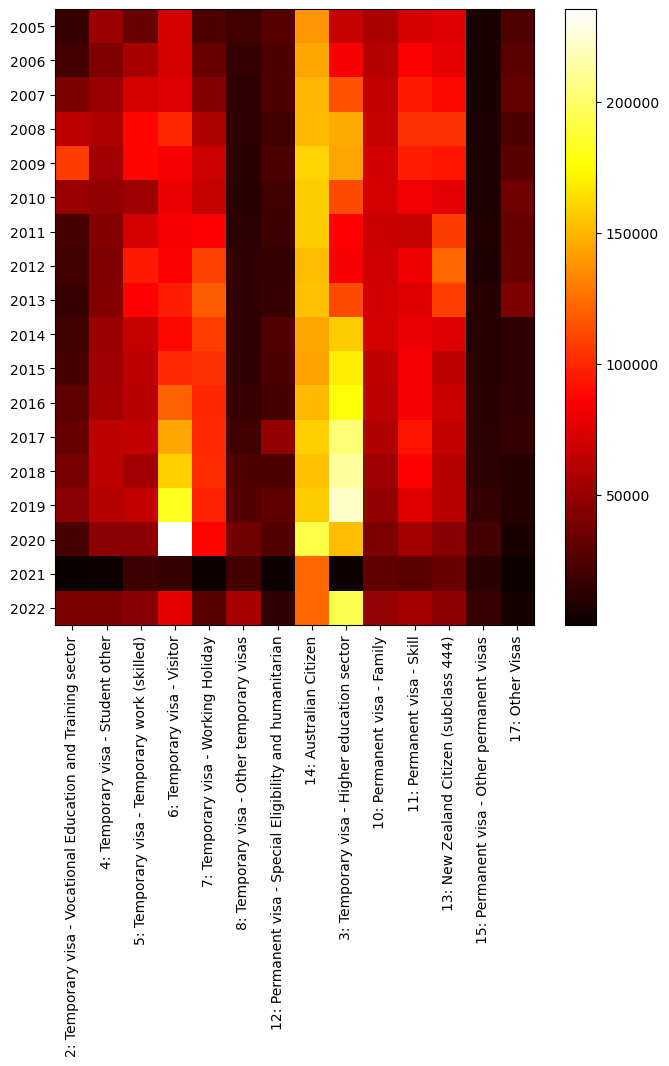

In [94]:
plt.figure(figsize=(8, 8))
plt.imshow(v_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(v_df.columns)), v_df.columns, rotation = 90)
plt.yticks(range(len(v_df.index)), v_df.index)
plt.show()

Temporary visa - Higher education sector has been a popular category since the year 2014 and the trend continues to be the same even after covid

In [64]:
age_gender_df.head()

,DATAFLOW,MEASURE: Measure,AGE: Age,SEX: Sex,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
0,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2005,1570,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
1,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2006,2080,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
2,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2007,2760,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
3,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2008,2890,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
4,ABS:NOM_FY(1.0.0),3: Net Overseas Migration,A30: 30-34,1: Males,3: Queensland,A: Annual,2009,3230,NUM: Number,NaN,NaN,30-6: Year Ending 30 June


In [65]:
table3 = age_gender_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table3

,OBS_VALUE
REGION: Region,
1: New South Wales,11153920
2: Victoria,8638130
3: Queensland,5846370
4: South Australia,1613320
5: Western Australia,3807790
6: Tasmania,300480
7: Northern Territory,379540
8: Australian Capital Territory,588050
AUS: Australia,32323700


In [66]:
#Dropping any rows that contain Totals and applying filter to only keep data related to 'arrivals'
age_gender_df = age_gender_df.loc[age_gender_df['MEASURE: Measure'] == '1: NOM arrivals']
rows_to_drop2 = age_gender_df[age_gender_df['AGE: Age'].str.contains('TOT:')].index
updated_age_gender_df = age_gender_df.drop(rows_to_drop2)
# Updated pivot table
table4 = updated_age_gender_df.pivot_table(index=['REGION: Region'],aggfunc={'OBS_VALUE':np.sum})
table4

,OBS_VALUE
REGION: Region,
1: New South Wales,2788490
2: Victoria,2159690
3: Queensland,1461680
4: South Australia,403390
5: Western Australia,952070
6: Tasmania,75100
7: Northern Territory,94960
8: Australian Capital Territory,147070
AUS: Australia,8080980


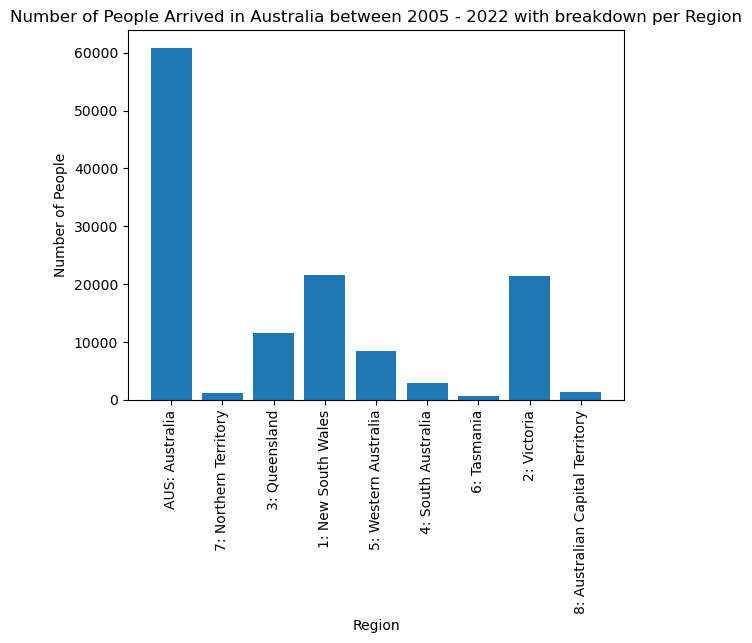

In [67]:
# Region and number of people arrived since 2005
x = updated_age_gender_df['REGION: Region']
y = updated_age_gender_df['OBS_VALUE'] 

# create bar plot
plt.bar(x, y)

# set plot title and axis labels
plt.title('Number of People Arrived in Australia between 2005 - 2022 with breakdown per Region')
plt.xlabel('Region')
plt.ylabel('Number of People')
plt.xticks(rotation = 90)

# show plot
plt.show()


In [68]:
updated_age_gender_df.head()

,DATAFLOW,MEASURE: Measure,AGE: Age,SEX: Sex,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment,REPYEAREND: Reporting Year End Day
54,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2005,3990,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
55,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2006,4140,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
56,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2007,4010,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
57,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2008,4850,NUM: Number,NaN,NaN,30-6: Year Ending 30 June
58,ABS:NOM_FY(1.0.0),1: NOM arrivals,A55: 55-59,1: Males,AUS: Australia,A: Annual,2009,4580,NUM: Number,NaN,NaN,30-6: Year Ending 30 June


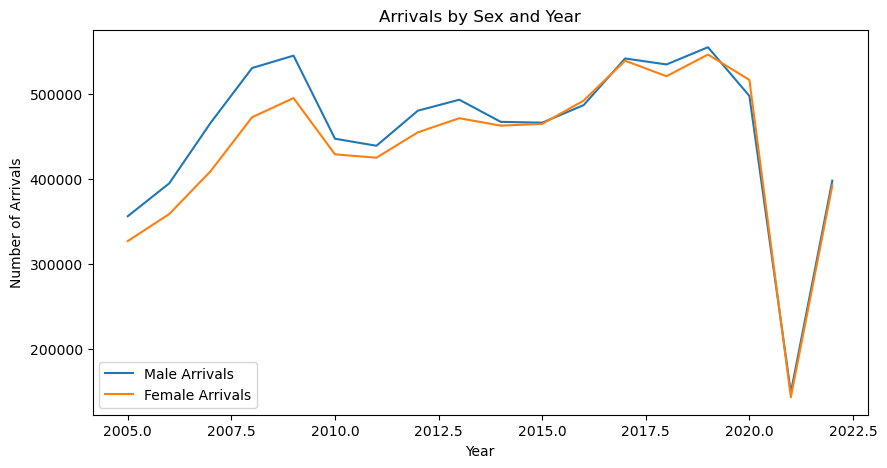

In [69]:

# filter the data for males and females separately
male_df = updated_age_gender_df[updated_age_gender_df['SEX: Sex'] == '1: Males']
female_df = updated_age_gender_df[updated_age_gender_df['SEX: Sex'] == '2: Females']

# group the data by year and sum the arrival numbers
male_arrivals = male_df.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
female_arrivals = female_df.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()

# create a line graph with both male and female arrivals
plt.figure(figsize=(10, 5))
plt.plot(male_arrivals.index, male_arrivals.values, label='Male Arrivals')
plt.plot(female_arrivals.index, female_arrivals.values, label='Female Arrivals')

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals by Sex and Year')

# add a legend
plt.legend()

# display the graph
plt.show()


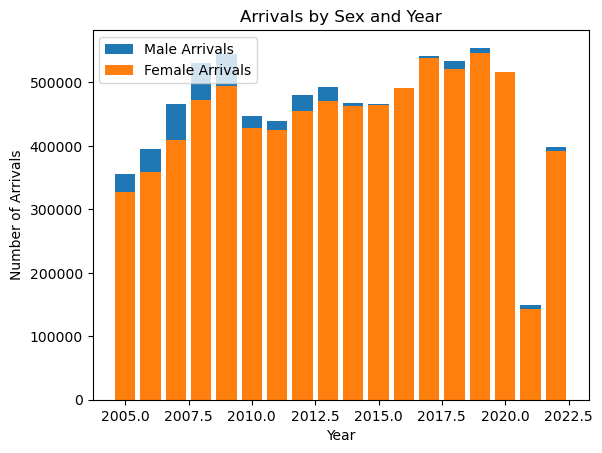

In [70]:
mf = pd.DataFrame({"Male": male_arrivals, "Female":female_arrivals})
plt.bar(male_arrivals.index, male_arrivals.values, label='Male Arrivals')
plt.bar(female_arrivals.index, female_arrivals.values, label='Female Arrivals')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals by Sex and Year')

# add a legend
plt.legend()

# display the graph
plt.show()
#mf

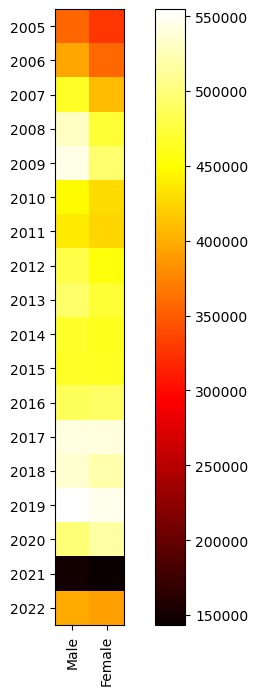

In [93]:
plt.figure(figsize=(8, 8))
plt.imshow(mf, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(mf.columns)), mf.columns, rotation = 90)
plt.yticks(range(len(mf.index)), mf.index)
plt.show()

Prior to COVID number of Male arrivals was higher than number of Female arrivals leading up to 2014. Years 2015, 2016 the gap was almost non-existent, 2017 and 2018 it increased again making number of Male arrivals higher than Females. In 2020, number of Male arrivals dropped and Female increased for a small period and is now again going back to the original. 

In [71]:
age_array = updated_age_gender_df['AGE: Age'].unique()

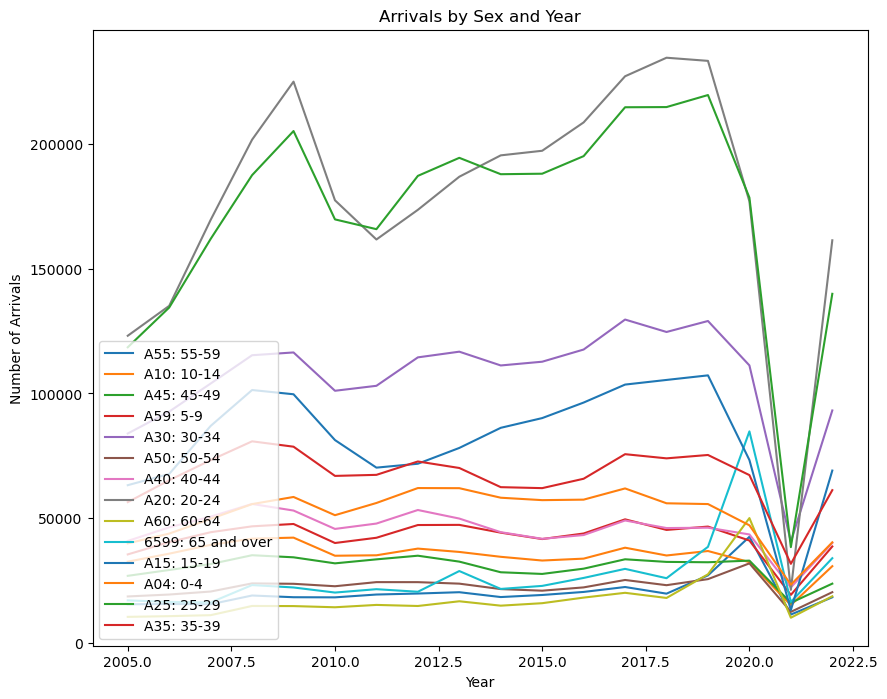

,A55: 55-59,A10: 10-14,A45: 45-49,A59: 5-9,A30: 30-34,A50: 50-54,A40: 40-44,A20: 20-24,A60: 60-64,6599: 65 and over,A15: 15-19,A04: 0-4,A25: 25-29,A35: 35-39
TIME_PERIOD: Time Period,,,,,,,,,,,,,,
2005,15540,32600,26930,35510,83940,18670,40900,123100,10490,17100,63240,39930,118480,56450
2006,15660,35810,29270,40440,92710,19440,46350,135070,10780,16470,67740,43850,134400,65220
2007,15550,39340,31650,44400,103960,20640,50630,169500,11170,16270,86970,49740,161880,73260
2008,19050,41820,35190,46760,115300,23900,55720,201640,14860,23230,101360,55670,187430,80810
2009,18360,42230,34350,47700,116410,23740,53080,224890,14810,22270,99660,58520,205100,78660
2010,18310,34980,31930,40080,101060,22760,45720,177360,14340,20230,81310,51220,169710,66960
2011,19440,35160,33530,42180,103050,24410,47870,161660,15280,21580,70270,56110,165790,67380
2012,19840,37840,34990,47280,114440,24400,53300,173540,14850,20550,71830,62090,187140,72740
2013,20370,36500,32620,47340,116720,23800,49870,186800,16740,28850,78160,62040,194370,70130


In [78]:
#a55_df = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == 'A55: 55-59']
#a10_df = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == 'A10: 10-14']
#a45_df = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == 'A45: 45-49']
#a59_df = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == 'A59: 5-9']
#a30_df = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == 'A30: 30-34']
age_array = updated_age_gender_df['AGE: Age'].unique()
i = 1
plt.figure(figsize=(10, 8))
age_bracket_dict = {}
for i, age in enumerate(age_array):
    age_bracket = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == age]
    age_bracket1 = age_bracket.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
    plt.plot(age_bracket1.index, age_bracket1.values, label=age)
    age_bracket_dict[age] = age_bracket1

# group the data by year and sum the arrival numbers
#male_arrivals = male_df.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
#female_arrivals = female_df.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()

# create a line graph with both male and female arrivals
#plt.plot(male_arrivals.index, male_arrivals.values, label='Male Arrivals')
#plt.plot(female_arrivals.index, female_arrivals.values, label='Female Arrivals')

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals by Sex and Year')

# add a legend
plt.legend(loc='lower left')

# display the graph
plt.show()
df = pd.DataFrame(age_bracket_dict)
df

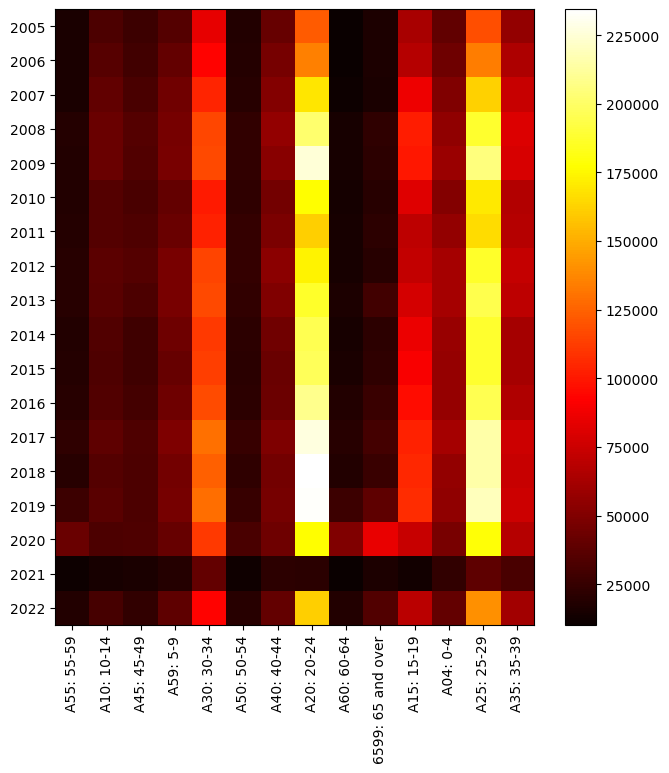

In [92]:
# plot the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation = 90)
plt.yticks(range(len(df.index)), df.index)
plt.show()

Overall 'A20: 20-24' is the most popular category followed by 'A25: 25-29', 'A30: 30-34' and 'A15: 15-19'
During years 2016 - 2019 we had the maximum number of arrivals
It appears that covid has made no impact on the age bracket and in the year 2022 the same trend continues as before covid

In [82]:
merged_df = pd.merge(mf,df, on='TIME_PERIOD: Time Period')
merged_df

,Male,Female,A55: 55-59,A10: 10-14,A45: 45-49,A59: 5-9,A30: 30-34,A50: 50-54,A40: 40-44,A20: 20-24,A60: 60-64,6599: 65 and over,A15: 15-19,A04: 0-4,A25: 25-29,A35: 35-39
TIME_PERIOD: Time Period,,,,,,,,,,,,,,,,
2005,356060,326820,15540,32600,26930,35510,83940,18670,40900,123100,10490,17100,63240,39930,118480,56450
2006,394650,358560,15660,35810,29270,40440,92710,19440,46350,135070,10780,16470,67740,43850,134400,65220
2007,465910,409050,15550,39340,31650,44400,103960,20640,50630,169500,11170,16270,86970,49740,161880,73260
2008,530290,472450,19050,41820,35190,46760,115300,23900,55720,201640,14860,23230,101360,55670,187430,80810
2009,544840,494940,18360,42230,34350,47700,116410,23740,53080,224890,14810,22270,99660,58520,205100,78660
2010,447170,428800,18310,34980,31930,40080,101060,22760,45720,177360,14340,20230,81310,51220,169710,66960
2011,438880,424830,19440,35160,33530,42180,103050,24410,47870,161660,15280,21580,70270,56110,165790,67380
2012,480130,454700,19840,37840,34990,47280,114440,24400,53300,173540,14850,20550,71830,62090,187140,72740
2013,493030,471280,20370,36500,32620,47340,116720,23800,49870,186800,16740,28850,78160,62040,194370,70130


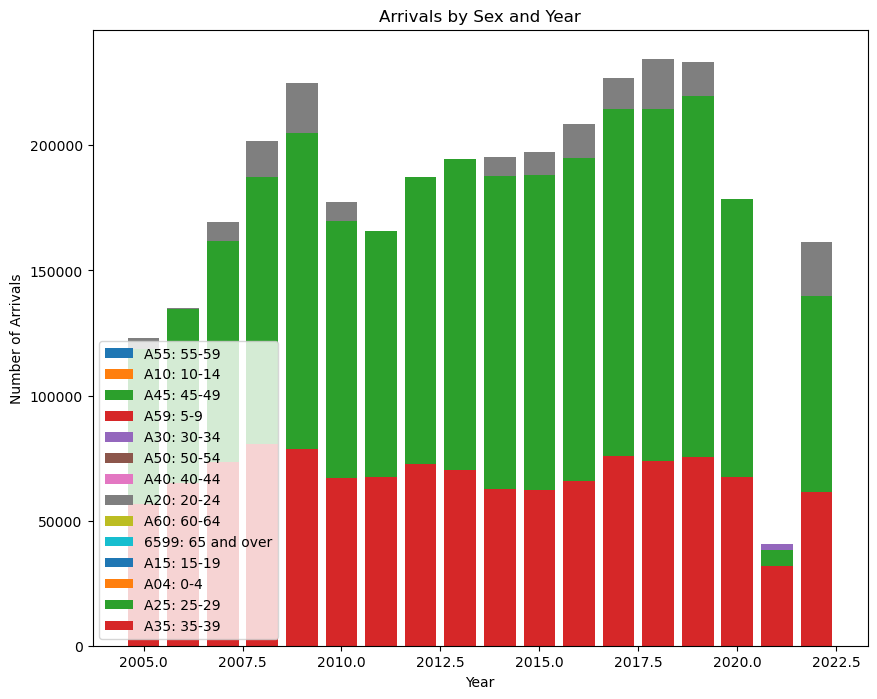

In [79]:
age_array = updated_age_gender_df['AGE: Age'].unique()
i = 1
plt.figure(figsize=(10, 8))
age_bracket_dict = {}
for i, age in enumerate(age_array):
    age_bracket = updated_age_gender_df[updated_age_gender_df['AGE: Age'] == age]
    age_bracket1 = age_bracket.groupby('TIME_PERIOD: Time Period')['OBS_VALUE'].sum()
    plt.bar(age_bracket1.index, age_bracket1.values, label=age)
    age_bracket_dict[age] = age_bracket1

plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals by Sex and Year')

# add a legend
plt.legend(loc='lower left')

# display the graph
plt.show()

In [96]:
'''counter = 0
for index, row in updated_age_gender_df.iterrows():
    plt.bar(counter-0.2, row['1: Males'], width=0.4, align='center', label='Male Arrivals ({})'.format(row['AGE: Age']))
    plt.bar(counter+0.2, row['2: Females'], width=0.4, align='center', label='Female Arrivals ({})'.format(row['AGE: Age']))
    counter += 1
    
plt.xticks(range(len(updated_age_gender_df)), updated_age_gender_df['AGE: Age'])
    
# add labels and a title
plt.xlabel('Age Bracket')
plt.ylabel('Number of Arrivals')
plt.title('Arrivals by Sex and Age Bracket')

# add a legend
plt.legend()

# display the graph
plt.show()'''


"counter = 0\nfor index, row in updated_age_gender_df.iterrows():\n    plt.bar(counter-0.2, row['1: Males'], width=0.4, align='center', label='Male Arrivals ({})'.format(row['AGE: Age']))\n    plt.bar(counter+0.2, row['2: Females'], width=0.4, align='center', label='Female Arrivals ({})'.format(row['AGE: Age']))\n    counter += 1\n    \nplt.xticks(range(len(updated_age_gender_df)), updated_age_gender_df['AGE: Age'])\n    \n# add labels and a title\nplt.xlabel('Age Bracket')\nplt.ylabel('Number of Arrivals')\nplt.title('Arrivals by Sex and Age Bracket')\n\n# add a legend\nplt.legend()\n\n# display the graph\nplt.show()"

In [107]:
groupby = updated_age_gender_df.groupby(['TIME_PERIOD: Time Period', 'REGION: Region'])['OBS_VALUE'].sum()
groupby

TIME_PERIOD: Time Period  REGION: Region                 
2005                      1: New South Wales                 125190
                          2: Victoria                         81270
                          3: Queensland                       65400
                          4: South Australia                  16620
                          5: Western Australia                40000
                                                              ...  
2022                      5: Western Australia                30560
                          6: Tasmania                          5140
                          7: Northern Territory                4940
                          8: Australian Capital Territory      8460
                          AUS: Australia                     394980
Name: OBS_VALUE, Length: 162, dtype: int64